### Breadth For Equity Indices

Objective: To analyze how many stocks are above 10, 20, 50, 100, and 200 simple moving averages to identify the turning points in equity indices

##### Import packages

In [32]:
import eikon as TR
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

##### Import App Key

In [34]:
TR.set_app_key('29e7c9361eb64e748246349dff7c07a532e1f41d')

##### Pull Price Close and SMA

In [35]:
start_date = '2018-01-01'
end_date = '2020-05-30'
ric='0#.NDX'
Breadth, e= TR.get_data([ric],['TR.closeprice.date','TR.closeprice'],
                       {'SDate':start_date,'EDate':end_date,'Frq':'D'})

##### Moving Averages

In [36]:
SMA = [10,20,50,100,200]

for i in SMA:
    Breadth['SMA_{}'.format(i)] = Breadth['Close Price'].rolling(i).mean()

##### Breadth Count

In [37]:
for i in SMA:
    Breadth['Cbr{}'.format(i)] = np.where(Breadth['Close Price']>Breadth['SMA_{}'.format(i)],1,0)

##### Set Date To Index

In [38]:
Breadth['Date'] = Breadth['Date'].apply(pd.to_datetime)
Breadth.set_index('Date', inplace=True)
Breadth.head()

,Instrument,Close Price,SMA_10,SMA_20,SMA_50,SMA_100,SMA_200,Cbr10,Cbr20,Cbr50,Cbr100,Cbr200
Date,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,INCY.OQ,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2018-01-02 00:00:00+00:00,INCY.OQ,100.89,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2018-01-03 00:00:00+00:00,INCY.OQ,100.98,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2018-01-04 00:00:00+00:00,INCY.OQ,98.44,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2018-01-05 00:00:00+00:00,INCY.OQ,99.85,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


##### Today's Breadth

In [39]:
Br_Date = Breadth.groupby(['Date'])
Br_Ratio = (Br_Date.sum()/Br_Date.count()*100)
column_names = ['Cbr10','Cbr20','Cbr50','Cbr100','Cbr200']
Br_Today = Br_Ratio.sort_values(['Date'],ascending=False).head(1).round().reindex(columns=column_names)
Br_Today

,Cbr10,Cbr20,Cbr50,Cbr100,Cbr200
Date,,,,,
2020-05-29 00:00:00+00:00,87.0,90.0,99.0,78.0,72.0


##### Historical Breadth

In [40]:
Hist_Br = Breadth.groupby(['Date']).sum()/Breadth.groupby(['Date']).count()*100
Hist_Br.tail().round()

,Cbr10,Cbr100,Cbr20,Cbr200,Cbr50,Close Price,Instrument,SMA_10,SMA_100,SMA_20,SMA_200,SMA_50
Date,,,,,,,,,,,,
2020-05-22 00:00:00+00:00,76.0,62.0,81.0,57.0,91.0,23399.0,NaN,22837.0,21469.0,22376.0,20825.0,20580.0
2020-05-26 00:00:00+00:00,76.0,71.0,78.0,63.0,95.0,23487.0,NaN,22902.0,21487.0,22464.0,20844.0,20661.0
2020-05-27 00:00:00+00:00,78.0,75.0,87.0,68.0,96.0,23554.0,NaN,23022.0,21502.0,22572.0,20863.0,20789.0
2020-05-28 00:00:00+00:00,77.0,73.0,85.0,68.0,96.0,23524.0,NaN,23167.0,21518.0,22640.0,20884.0,20897.0
2020-05-29 00:00:00+00:00,87.0,78.0,90.0,72.0,99.0,23938.0,NaN,23324.0,21537.0,22737.0,20906.0,21033.0


##### Input For Charting

In [41]:
Inst = 'QQQ.O'
Index, e= TR.get_data([Inst],['TR.closeprice.date','TR.closeprice'],
                       {'SDate':start_date,'EDate':end_date,'Frq':'D'})
Index['Date'] = Index['Date'].apply(pd.to_datetime)
Index.set_index('Date', inplace=True)

Text(0.5, 1.0, 'Breadth of the Nasdaq 100')

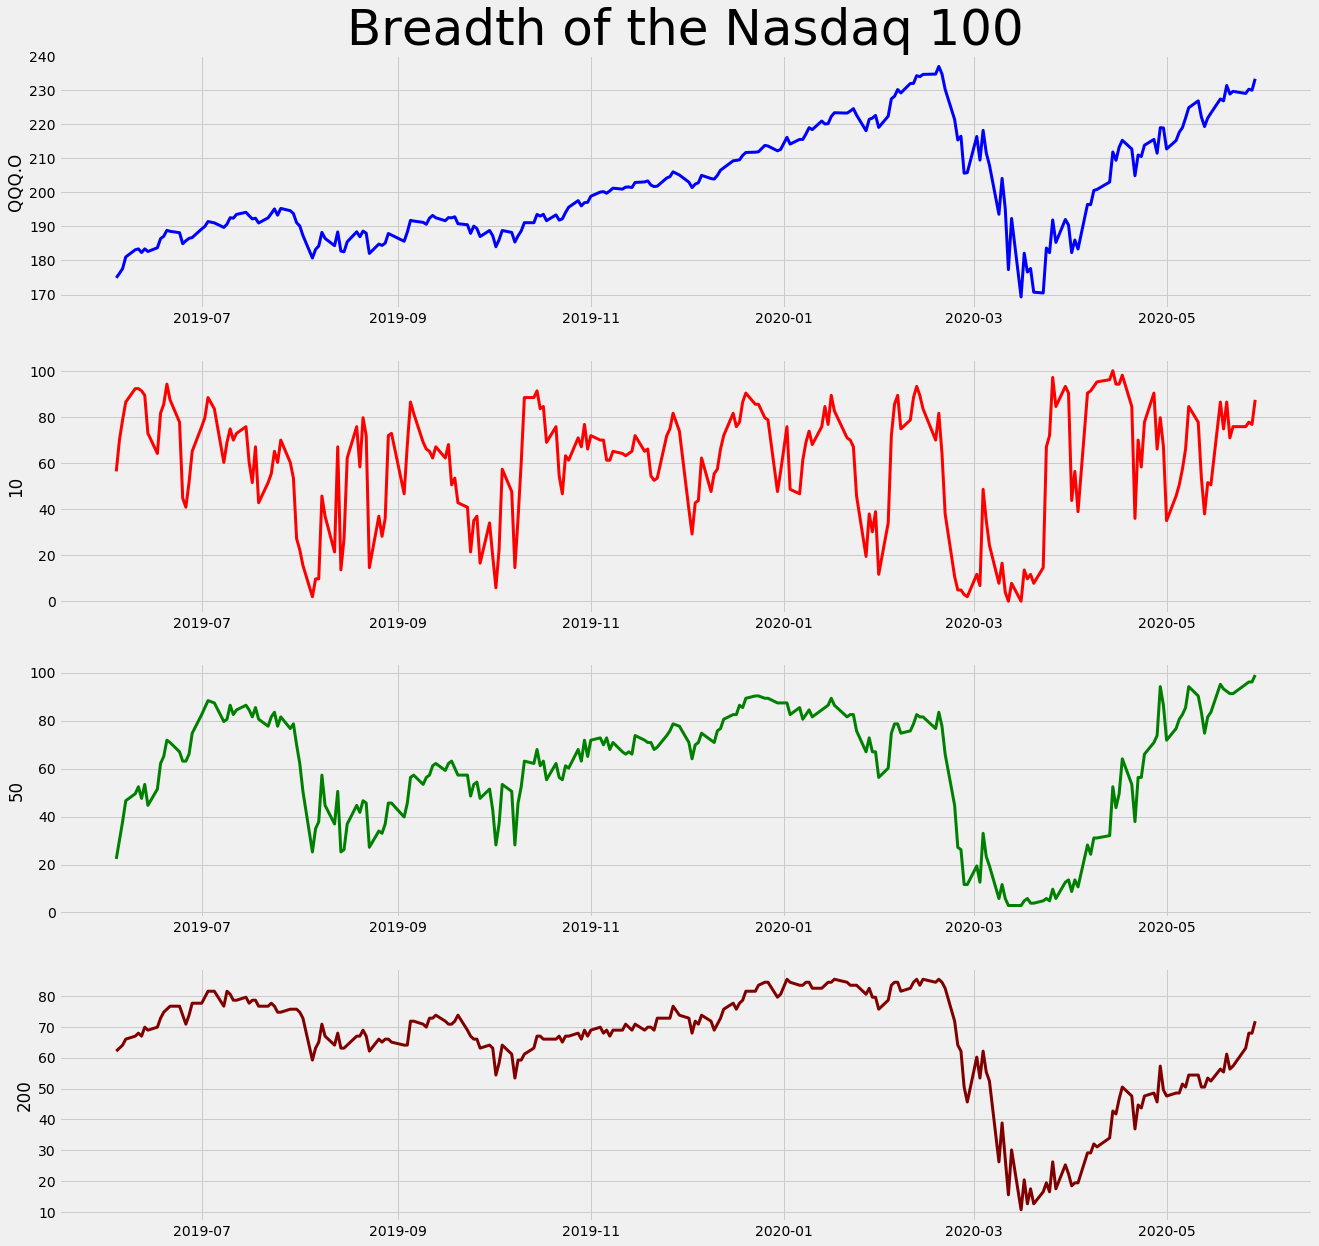

In [43]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.plot(Index['Close Price'][-250:],c='blue',linewidth=3)
ax1.set_ylabel(Inst)
ax2.plot(Hist_Br['Cbr10'][-250:],c='R',linewidth=3)
ax2.set_ylabel('10')
ax3.plot(Hist_Br['Cbr50'][-250:],c='G',linewidth=3)
ax3.set_ylabel('50')
ax4.plot(Hist_Br['Cbr200'][-250:],c='maroon',linewidth=3)
ax4.set_ylabel('200')

ax1.set_title('Breadth of the Nasdaq 100', size=50)